# La différentiation automatique et un début de *deep learning* ☕️

**<span style='color:blue'> Objectifs de la séquence</span>** 
* Être sensibilisé&nbsp;:
    * à l'idée de différentiation automatique,
    * au rôle pilier de la différentiation automatique en *deep learning*.
* Comprendre&nbsp;:
    * le fonctionnement du perceptron (l'architecture la plus simple),
    * le fonctionnement de l'algorithme de rétro-propagation du gradient (i.e. différentiation automatique).
* Être capable de&nbsp;:
    * manipuler des architectures plus compliquées via $\texttt{pytorch}$.
    
    


 ----

Quelques liens pour aller plus loin :
* [Autodiff](https://github.com/maximiliense/lmpirp/blob/main/Notes/Automatic_differentiation.pdf)

Comme vu précédemment, un grand nombre de modèles de *machine learning* s'appuient sur des algorithmes d'optimisation de type "descente de gradient". Ces algorithmes requièrent le calcul du gradient à chaque itération. Nous avons pu voir pour la régression linéaire et la régression logistique que cela était assez fastidieux. Ainsi, en pratique, on ne se sert que de modèles déjà codés et où il n'est pas nécessaire de fournir le gradient.

Le *deep learning*, à l'inverse, s'appuie sur une quantité incroyable de modèles, customisés à la moindre occasion. Le *deep learning* n'échappe pas à la règle et est également optimisé au travers d'algorithmes d'optimisation de type "descente de gradient". Heureusement, il n'est pas nécessaire de calculer le gradient à la main de ces fonctions immenses. Les *frameworks* de *deep learning* sont en effet avant tout des *frameworks* de différentiation automatique.

## I. Premiers tests avec Pytorch

Commençons tout d'abord par quelques exercices simples d'utilisation de la différentiation automatique.

In [1]:
import torch

**<span style='color:blue'> Exercice</span>** 
**Commençons simple. Soit la fonction suivante :**

$$f(x)=3x+5$$

**Calculer $\partial f(0)/\partial x$ à la main et via *torch*.**



 ----

In [ ]:
####### Complete this part ######## or die ####################
def f(x):
    return ...

x = ...

...
###############################################################
print('La derivee en 0 de f est', float(x.grad))


**<span style='color:blue'> Exercice</span>** 
**Un tout petit peu plus compliqué. Soit la fonction suivante :**

$$f(x)=2^x$$

**Calculer $\partial f(0)/\partial x$  et $\partial f(1)/\partial x$ à la main et via *torch*.**



 ----

In [ ]:
####### Complete this part ######## or die ####################
def f(x):
    return ...

x = ...
...
###############################################################
print('La derivee en 0 de f est', float(x.grad))

####### Complete this part ######## or die ####################
x = ...
...
###############################################################
print('La derivee en 1 de f est', float(x.grad))


**<span style='color:blue'> Exercice</span>** 
**Encore un peu plus compliqué, le gradient des moindres carrés. Calculer $\partial f(0)/\partial \boldsymbol{\beta}$.**



 ----
**<span style='color:green'> Indices</span>** 
Rappelez-vous que les moindres carrés sont donnés par :

$$\lVert X\beta-y\rVert_2^2.$$

Il suffit de construire la fonction $\texttt{least}\_\texttt{square}$ qui effectue ce calcul et d'utiliser $\texttt{pytorch}$ afin de calculer le gradient.


 ----

In [4]:
real_beta = torch.rand(size=(2, 1))*2-1

def sample_data(n):
    X = torch.rand(size=(n, 2))
    y = torch.matmul(X, real_beta) + torch.randn(size=(n, 1))
    return X, y

X, y = sample_data(10)

In [ ]:
beta = torch.zeros(size=(2, 1), requires_grad=True)

print('Le gradient "a la main" est :\n', -2*torch.matmul(X.transpose(1, 0), y))

####### Complete this part ######## or die ####################
def least_square(param):
    ...
    return ...

...
###############################################################

print('Le gradient via auto-differentiation:\n', beta.grad)


## II. Le perceptron

Un réseau de neurones est dans sa version la plus élémentaire un ensemble de neurones. Avant d'aller plus loin, nous pouvons construire la version la plus élémentaire d'un neurone. Il s'agit d'une fonction $\mathbb{U}^d\rightarrow \{0, 1\}$ qui reçoit un ensemble de stimulis et s'active, ou non, en retour. La notion d'activation laisse penser à une fonction indicatrice $\mathbf{1}\{\text{condition}\}$ qui prend la valeur $1$ si une condition est remplie et $0$ sinon.
### a. Un neurone de booléens

Ici, $\mathbb{U}=\{0, 1\}$ et le neurone prend la forme suivante&nbsp;:

$$f_{w, b}(x)=\mathbf{1}\left\{w\sum_i x_i +b\geq 0\right\}$$

En combinant ce genre de fonctions avec différentes valeurs de $w$ et $b$ nous pouvons calculer toutes les fonctions booléennes possibles.

**<span style='color:blue'> Exercice</span>** 
Proposez une paramétrisation de $f_{w, b}$ (ou une composition/combinaison de $f_{w, b}$) afin de calculer les fonctions suivantes&nbsp;:

$$\begin{aligned}
\text{ou}(a, b)&=f_{?,?}(?)\\
\text{et}(a, b)&=f_{?,?}(?)\\
\text{non}(a)&=f_{?,?}(?)\\
\text{non}(\text{et}(a, b))&=?
\end{aligned}$$

où $a, b\in\{0, 1\}$. Vous rappellerez la table de vérité de ces fonctions logiques si besoin.



 ----

On se rend assez rapidement compte qu'optimiser ce genre de fonctions est NP-difficile.

### b. Le perceptron

Le perceptron est un algorithme de classification binaire inventé en 1958 par Frank Rosenblatt. Contrairement au cas booléen, les "connexions" peuvent avoir des intensités différentes. Nous avons en particulier $\mathbb{U}=\mathbb{R}$ et&nbsp;:

$$f_{\mathbf{w}, b}(x)=\mathbf{1}\left\{\sum_i w_ix_i +b\geq 0\right\}$$

Dans le langage des réseaux de neurones la fonction $\sigma(\cdot)=\mathbf{1}\{\cdot\}$ s'appelle "une fonction d'activation".

L'objectif est donc ici de trouver les paramètres $\mathbf{w}$ et $b$ tels que pour un problème donné l'erreur de classification $\mathbb{P}(f_{\mathbf{w}, b}(X)\neq Y)$ est faible. Pour cela et comme pour les autres scénarios, nous allons collecter un jeu de données $S_n=\{(X_i, Y_i)\}_{i\leq n}\sim \mathbb{P}^n$ et réaliser notre "apprentissage"/optimisation dessus. Sans perte de généralité, supposons $b=0$ dans la suite. L'optimisation du perceptron fonctionne de la manière suivante&nbsp;:

* Set $k=0$ and $w^{(k)}=\mathbf{0}$
* while $\exists i$ s.t. $y_i(w^{(k)}\cdot x_i)\leq 0$
  * update $w^{(k+1)}=w^{(k)}+(y_i-\sigma(w^{(k)}\cdot x_i))x_i$ and $k=k+1$.
  
  
Dans le cas où $b\neq 1$, il suffit de rajouter une dimension aux $x$ avec un $1$ et une dimension à $\mathbf{w}$. Remarquez que la partie $(y_i-\sigma(w^{(k)}\cdot x_i))$ vaut $1$ ou $-1$ s'il y a une erreur et en fonction du vrai label. Elle vaut $0$ sinon.

Considérons maintenant un cas pratique.

In [6]:
import numpy as np

real_w = np.random.normal(0, 1, size=2)

def sample_data(n, beta):
    # sampling x and adding the bias
    X = np.random.uniform(-1, 1, size=(n, 2))
    
    # the label is deterministic
    y = (np.dot(X, real_w)>0)*1
    
    return X, y
    
X, y = sample_data(20, real_beta)

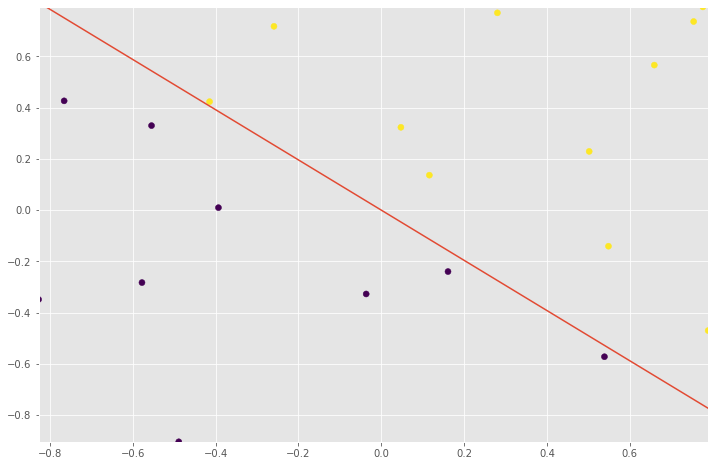

In [7]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)
plt.style.use('ggplot')

def plot(X, y, w=None, title=None):
    ymin_ = X[:,1].min()
    ymax_ = X[:,1].max()
    xmin_ = X[:,0].min()
    xmax_ = X[:,0].max()
    
    plt.scatter(X[:,0], X[:,1], c=y)
    
    if w is not None:
        x_ = np.linspace(xmin_, xmax_, 500)
        y_  =  - x_ * w[0] / w[1]
        plt.plot(x_, y_)
    
    if title is not None:
        plt.title(title)
    plt.xlim(xmin_, xmax_)
    plt.ylim(ymin_, ymax_)
    plt.show()
plot(X, y, real_w)

**<span style='color:blue'> Exercice</span>** 
Complétez le code ci-dessous afin d'implémenter l'algorithme du Perceptron décrit plus haut.



 ----

In [ ]:
####### Complete this part ######## or die ####################
def train_perceptron(X, y, nb_epochs=20):
    w = np.zeros(2)
    ...
    ...
    return w
###############################################################


In [ ]:
plot(X, y, train_perceptron(X, y))


**<span style='color:blue'> Proposition</span>** Si les deux propositions suivantes sont satisfaites&nbsp;:
1. $\exists R>0,\ \forall i,\ \lVert x_i\rVert \leq R$
2. $\exists \gamma > 0,\ w^\star, \lVert w^\star\rVert =1,\ \forall i,\ (\mathbf{1}\{y_i=1\}-\mathbf{1}\{y_i=0\})(x_i\cdot w^\star)\geq \gamma/2$ (une marge)

alors l'algorithme du perceptron convergera (i.e, il trouvera un vecteur $w$ tel que $\forall i,\ (\mathbf{1}\{y_i=1\}-\mathbf{1}\{y_i=0\})(x_i\cdot w)\geq 0$).



 ----
**<span style='color:orange'> Preuve</span>** 
L'algorithme a convergé, lorsque tous les points sont bien classés. Supposons que ce ne soit pas le cas à l'itération $k$ et notons $w^\star$ le vecteur des hypothèses ainsi que $i$ l'indice du point concerné par l'erreur. 

**Étape 1**


Nous avons&nbsp;:

$$\begin{aligned}
w^{(k+1)}\cdot w^\star &= (w^{(k)}+(y_i-\sigma(w^{(k)}\cdot x_i))x_i)\cdot w^\star\\
&=w^{(k)}\cdot w^\star + (y_i-\sigma(w^{(k)}\cdot x_i))(x_i\cdot w^\star)\\
&\geq w^{(k)}\cdot w^\star + \frac{\gamma}{2}\\
&\geq (k+1)\frac{\gamma}{2}\text{ (par récurrence)}
\end{aligned}$$

Via [l'inégalité de Cauchy-Schwarz](https://fr.wikipedia.org/wiki/Inégalité_de_Cauchy-Schwarz), nous avons&nbsp:

$$w^{(k)}\cdot w^\star \leq \lVert w^{(k)}\rVert \lVert w^\star\rVert \Leftrightarrow (w^{(k)}\cdot w^\star)^2 \leq \lVert w^{(k)}\rVert^2 \lVert w^\star\rVert^2.$$

Ainsi&nbsp;:

$$\begin{aligned}
\lVert w^{(k)} \rVert^2 &\geq \frac{(w^{(k)}\cdot w^\star)^2}{\lVert w^\star\rVert^2}\\
&\geq \frac{k^2\gamma^2}{4}
\end{aligned}$$

**Étape 2**

Nous avons ensuite&nbsp;:

$$\begin{aligned}
\lVert w^{(k+1)}\rVert^2 &= w^{(k+1)}\cdot w^{(k+1)}\\
&=(w^{(k)}+(y_i-\sigma(w^{(k)}\cdot x_i))x_i)\cdot (w^{(k)}+(y_i-\sigma(w^{(k)}\cdot x_i))x_i)\\
&=w^{(k)}\cdot w^{(k)}+2 \underbrace{(y_i-\sigma(w^{(k)}\cdot x_i))x_i\cdot w^{(k)})}_{\leq 0} + x_i\cdot x_i\\
&\leq \lVert w^{(k)}\rVert^2+\lVert x_i\rVert^2\leq \lVert w^{(k)}\rVert^2+R^2\\
&\leq (k+1)R^2\text{ (par récurrence)}
\end{aligned}$$

**Conclusion**

Nous avons ainsi&nbsp;:

$$\begin{aligned}\frac{k^2\gamma^2}{4}&\leq \lVert w^{(k)}\rVert^2\leq kR^2\\
\Leftrightarrow k\leq \frac{4R^2}{\gamma}
\end{aligned}$$

et le nombre maximum d'itérations avant que tous les points soient bien classés est $\left\lfloor \frac{4R^2}{\gamma}\right\rfloor$.



 ----

### c. Le perceptron multi-couches (MLP)

Si on considère le perceptron comme un neurone, le perceptron multi-couches revient à connecter plusieurs neurones à la suite et en parallèle comme illustré par l'image ci-dessous.

---

![Multi-Layer Perceptron](https://raw.githubusercontent.com/maximiliense/lmiprp/main/Travaux%20Pratiques/Machine%20Learning/Introduction/data/Introduction/neural_network_output.png)

---

Une telle généralisation est non-triviale et mis du temps à être proposée. La solution est l'algorithme de rétro-propagation de l'erreur. 

Plus formellement, $x\in\mathcal{X}$ est un vecteur d'entrée et $z^{(i)}\in\mathbb{R}^{d_i}$ est le vecteur de sortie de la $i^{\text{eme}}$ couche dont la dimension est $d_i$. Par simplicité, notons $z^{(0)}=x$. Les paramètres de la $i^\text{eme}$ couche sont notés $W^{(i)}\in\mathbb{R}^{d_i\times d_{i-1}}$ et $b^{(i)}\in\mathbb{R}^{d_i}$. Une couche se construit formellement de la manière suivante&nbsp;:

$$z^{(i)}=\sigma\left(W^{(i)}z^{(i-1)}+b^{(i)}\right),$$

où $\sigma$ est une fonction d'activation appliquée dimension par dimension. Notons $\mathbf{W}$ et $\mathbf{b}$ les paramètres de notre perceptron multi-couches. Nous avons ainsi&nbsp;:

$$f_{\mathbf{W},\mathbf{b}}(x)=z^{(p)},$$

où $p$ est le nombre de couches.

**<span style='color:blue'> Exercice</span>** 
Si $\sigma(x)=ax+c$ (i.e., est une fonction affine), que dire de $f_{\mathbf{W},\mathbf{b}}$ ?



 ----

Il n'est pas non plus "possible" d'utiliser la fonction indicatrice $\mathbf{1}\{\cdot\}$ précédente. En effet, soit $f(x)=\mathbf{1}\{x\}$. On a donc $\forall x\neq 0$ $f^\prime(x)=0$ et la rétropropagation de l'erreur devient problématique. Ce dernier est en effet basé sur le calcul du gradient.

Un choix courant est celui-de la tangente hyperbolique&nbsp;:

$$\sigma(x)=(1+e^{-2x})^{-1}-1\in[-1;1]$$

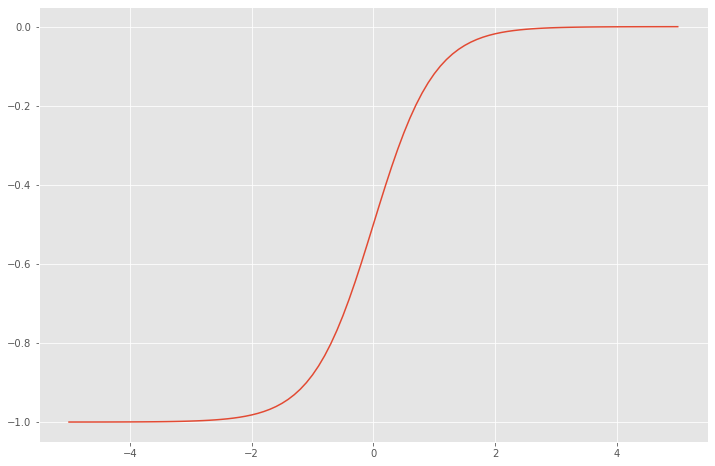

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 101)
y = np.power(1+np.exp(-2*x), -1)-1
plt.figure()
plt.plot(x, y)
plt.show()

On note cependant que lorsque $|x|$ devient grand devant $0$, la tangente hyperbolique voit sa dérivée tendre vers $0$ et la rétropropagation devient problématique à nouveau. Une autre fonction d'activation a ainsi été proposée dans les année 2010 et a participé activement aux succès du *deep learning* aujourd'hui&nbsp;:

$$\sigma(x)=\max(0;x)=\text{ReLU}(x)\text{ (Rectified Linear Unit)}$$

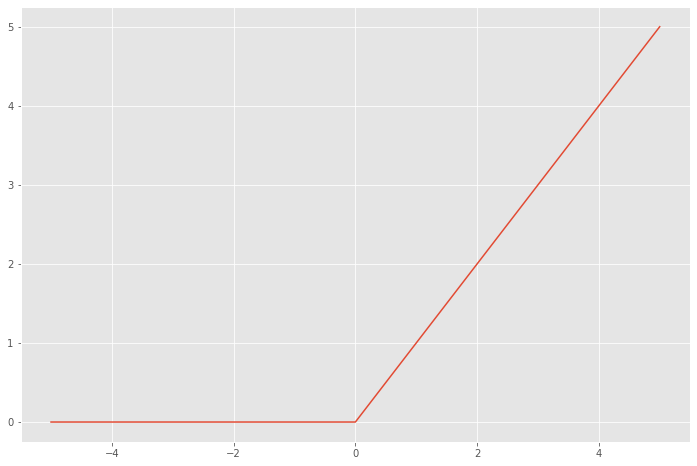

In [11]:
x = np.linspace(-5, 5, 101)
y = (x>0).astype(float)*x
plt.figure()
plt.plot(x, y)
plt.show()

**<span style='color:blue'> Théorème d'approximation universelle</span>** 
Soit $U\in\mathbb{R}^n$ un compact (i.e. une union de segment fermés et bornés), soit $g\in\mathcal{C}(U;\mathbb{R})$ une fonction continue de $U$ dans $\mathbb{R}$. Soit $f_{\mathbf{W}, \mathbf{b}}$ un MLP avec une unique couche cachée de largeur $p$ et des activations $\texttt{ReLU}$. Alors on peut approximer aussi précisément qu'on le souhaite la fonction $g$ via $f_{\mathbf{W},\mathbf{b}}$&nbsp;:

$$\forall \epsilon >0,\ \exists \mathbf{W},\mathbf{b},\ s.t. \lVert g- f_{\mathbf{W}, \mathbf{b}}\rVert_\infty<\epsilon$$



 ----
La question qui se pose maintenant est celle du calcul du gradient.

## III. Autograd

Considérons un MLP $f_{\mathbf{W}, \mathbf{b}}$ et une fonction de perte $R$ définie de la maniète suivante sur un jeu de données $S_n$&nbsp;:

$$R(f_{\mathbf{W}, \mathbf{b}})=\frac{1}{n}\sum_{x, y\in S_n} \ell(f_{\mathbf{W}, \mathbf{b}}(x);y)$$

Il est trivial de gérer la partie $1/n$ et la somme dans le calcul du gradient. Cependant, il est plus compliqué de calculer les dérivées partielles des éléments individuels $\ell$ en fonction des paramètres de $f_{\mathbf{W}, \mathbf{b}}$. Nous avons donc $z^{(0)}=x$ la donnée d'entrée, $z^{(i)}$ la sortie de la $i^\text{eme}$ couche et notons $s^{(i)}$ la sortie de la $i^\text{eme}$ couche avant activation.

L'algorithme autograd permet de calculer ce gradient automatiquement. Il fonctionne en deux passes&nbsp;:

1. La passe *forward* qui consiste à calculer notre fonction (et éventuellement à stocker les résultats intermédiaires du calcul),
2. La passe *backward* qui permet de rétropropager l'erreur.

La brique de base de cet algorithme est la dérivée d'une composition de fonction. Rappellez-vous, nous avons&nbsp;:

$$(f\circ g)^\prime = (f^\prime\circ g)g^\prime,$$

ou, en notation avec les dérivées partielles en ayant $g:\mathbb{R}^n\rightarrow \mathbb{R}^d$ et $f:\mathbb{R}^d\rightarrow\mathbb{R}$&nbsp;:

$$\frac{\partial f\circ g}{\partial x_i}(x)=\sum_{j=1}^d D_j f(g(x))\frac{\partial g_j}{\partial x_i}(x)$$

où $D_j f$ est la dérivée de $f$ par rapport à sa $j^\text{eme}$ composante. Noton $J(f)$ la matrice jacobienne de $f$, c'est-à-dire&nbsp;:

$$J_f(x)_{ij}=\frac{\partial f_i}{\partial x_j}(x).$$

Nous avons donc&nbsp;:

$$\frac{\partial f\circ g}{\partial x}(x)=J_{f\circ g}(x)= J_f(g(x))J_g(x).$$

Considérons donc maintenant une composition arbitrairement longue $f_p\circ\ldots\circ f_1$. Nous avons&nbsp;:

$$J_{f_p\circ\ldots\circ f_1}(x)=J_{f_p}((f_{p-1}\circ\ldots\circ f_1)(x))\ldots J_{f_1}(x)$$

**<span style='color:blue'> Exercice</span>** 
Soit les fonctions suivantes&nbsp;:

$$\begin{aligned}
f_1:\mathbb{R}^2&\rightarrow \mathbb{R}^2\\
    x&\mapsto [3x_1+4;5x_2-6]^T
\end{aligned}$$

$$\begin{aligned}
f_2:\mathbb{R}^2&\rightarrow \mathbb{R}\\
    x&\mapsto x_1+x_2
\end{aligned}$$

$$\begin{aligned}
f_3:\mathbb{R}&\rightarrow \mathbb{R}\\
    x&\mapsto (1+e^{-x})^{-1}
\end{aligned}$$

Calculez $J_{f_3\circ f_2\circ f_1}(x)$. Passez par les Jacobiennes individuelles.



 ----

L'algorithme autograd permet de calculer le gradient en mémorisant les étapes intermédiaires et en sachant calculer les dérivées partielles de chaque fonction intermédiaire. Attention, en pratique, on optimise les paramètres et la donnée d'entrée (i.e. $x$). Les dérivées partielles doivent donc être calculées pour chaque paramètre.

Notre MLP n'est rien d'autre qu'une grande composition de fonctions et nous pouvons appliquer la même logique.

Soit $s^{(i)}$ la sortie avant activation de notre $i^\text{eme}$ couche et $z^{(i)}$ la sortie après activation. Nous avons par le même raisonnement&nbsp;:

$$\frac{\partial \ell(f_{\mathbf{W}, \mathbf{b}}(x);y)}{\partial s^{(i)}_l}=\frac{\partial \ell(f_{\mathbf{W}, \mathbf{b}}(x);y)}{\partial z^{(i)}_l}\frac{\partial z^{(i)}_l}{\partial s^{(i)}_l}$$

En effet, $\ell(f_{\mathbf{W}, \mathbf{b}}(x);y)$ ne dépend de $s^{(i)}_l$ qu'au travers de $z^{(i)}_l$. En particulier, nous avons $z^{(i)}_l=\sigma\left(s^{(i)}_l\right)$ et donc&nbsp;:

$$\frac{\partial z^{(i)}_l}{\partial s^{(i)}_l}=\sigma^\prime\left(s^{(i)}_l\right)$$

Cela nous donne donc&nbsp;:

$$\frac{\partial \ell(f_{\mathbf{W}, \mathbf{b}}(x);y)}{\partial s^{(i)}}=\frac{\partial \ell(f_{\mathbf{W}, \mathbf{b}}(x);y)}{\partial z^{(i)}}\sigma^\prime\left(s^{(i)}\right)$$

De plus&nbsp;:

$$s^{(i)}=W^{(i)}z^{(i-1)}+b^{(i)}\Leftrightarrow s_l^{(i)}=\sum_j W^{(i)}_{lj}z^{(i-1)}_j+b^{(i)}_l$$

Ainsi&nbsp;:

$$\frac{\partial  \ell(f_{\mathbf{W}, \mathbf{b}}(x);y)}{\partial z^{(i-1)}_j}=\sum_{l}\frac{\partial  \ell(f_{\mathbf{W}, \mathbf{b}}(x);y)}{\partial s^{(i)}}\frac{\partial s^{(i)}}{\partial z^{(i-1)}_j}=\sum_{l}\frac{\partial  \ell(f_{\mathbf{W}, \mathbf{b}}(x);y)}{\partial s^{(i)}}W^{(i)}_{lj}$$

L'objectif reste de pouvoir calculer le gradient de nos paramètres. Nous avons donc&nbsp;:

$$\frac{\partial  \ell(f_{\mathbf{W}, \mathbf{b}}(x);y)}{\partial W^{(i)}_{lj}}=\frac{\partial  \ell(f_{\mathbf{W}, \mathbf{b}}(x);y)}{\partial s^{(i)}}\frac{\partial s^{(i)}}{\partial W^{(i)}_{lj}}=\frac{\partial  \ell(f_{\mathbf{W}, \mathbf{b}}(x);y)}{\partial s^{(i)}}z^{(i-1)}_j$$

et&nbsp;:

$$\frac{\partial  \ell(f_{\mathbf{W}, \mathbf{b}}(x);y)}{\partial b^{(i)}_{l}}=\frac{\partial  \ell(f_{\mathbf{W}, \mathbf{b}}(x);y)}{\partial s^{(i)}}\frac{\partial s^{(i)}}{\partial b^{(i)}_{l}}=\frac{\partial  \ell(f_{\mathbf{W}, \mathbf{b}}(x);y)}{\partial s^{(i)}}$$

**<span style='color:green'> Exemple</span>** 
Considérons le réseau de neurones (MLP) suivant&nbsp;.

![Neural network](https://raw.githubusercontent.com/maximiliense/lmiprp/main/Travaux%20Pratiques/Machine%20Learning/Introduction/data/Introduction/complete_neural_net.png)

Celui-ci possède 2 couches cachées que nous avons découpées en pré-activation et post-activation. La fonction $\sigma$ représente l'activation au milieu du réseau alors que la fonction $\gamma$ est la fonction sigmoïd qui permet de transformer notre logit en probabilité&nbsp;:

$$\gamma(z)=\left(1+e^{-z}\right)^{-1}$$

La variable $z^{(3)}$ est donc la sortie de notre modèle et le dernier nœud représente la fonction de perte appliquée à la prédiction de notre réseau.

Calculons dans un premier temps la dérivée partielle&nbsp;:

$$\frac{\partial  \ell(f_{\mathbf{W}, \mathbf{b}}(x);y)}{\partial \mathbf{W^{(3)}_{1}}}$$

Comme indiqué précédemment, il s'agit de partir de la sortie de notre modèle et de remonter jusqu'à $\mathbf{W^{(3)}_{1}}$ comme indiqué pour la figure suivante&nbsp;:

---

![Neural network](https://raw.githubusercontent.com/maximiliense/lmiprp/main/Travaux%20Pratiques/Machine%20Learning/Introduction/data/Introduction/W_1_neural_net.png)

---

On a ainsi&nbsp;:

$$\frac{\partial  \ell(f_{\mathbf{W}, \mathbf{b}}(x);y)}{\partial \mathbf{W^{(3)}_{1}}}=\frac{\partial  \ell(f_{\mathbf{W}, \mathbf{b}}(x);y)}{\partial z^{(3)}}\frac{\partial  z^{(3)}}{\partial s^{(3)}}\frac{\partial  s^{(3)}}{\partial \mathbf{W^{(3)}_{1}}}$$

Si on suppose que $\ell$ est la *cross-entropy*, alors&nbsp;:

$$\frac{\partial  \ell(f_{\mathbf{W}, \mathbf{b}}(x);y)}{\partial z^{(3)}}\frac{\partial  z^{(3)}}{\partial s^{(3)}}=y-\gamma\left(s^{(3)}\right)$$

De l'autre côté, on a&nbsp;:

$$\frac{\partial  s^{(3)}}{\partial \mathbf{W^{(3)}_{1}}}=z^{(2)}_1$$

En combinant tout, on obtient&nbsp;:

$$\frac{\partial  \ell(f_{\mathbf{W}, \mathbf{b}}(x);y)}{\partial \mathbf{W^{(3)}_{1}}}=\left(y-\gamma\left(s^{(3)}\right)\right) z^{(2)}_1$$

Cette formule illustre l'idée de "rétropopagation" de l'erreur. Nous sommes donc capable de calculer toutes les dérivées partielles de la forme&nbsp;:

$$\frac{\partial  \ell(f_{\mathbf{W}, \mathbf{b}}(x);y)}{\partial \mathbf{W^{(3)}_{j}}}$$


Calculons maintenant la dérivée partielle suivante&nbsp;:

$$\frac{\partial  \ell(f_{\mathbf{W}, \mathbf{b}}(x);y)}{\partial \mathbf{b^{(2)}_{1}}}$$

---

![Neural network](https://raw.githubusercontent.com/maximiliense/lmiprp/main/Travaux%20Pratiques/Machine%20Learning/Introduction/data/Introduction/b_1_neural_net.png)

---

$$\frac{\partial  \ell(f_{\mathbf{W}, \mathbf{b}}(x);y)}{\partial \mathbf{b^{(2)}_{1}}}=\frac{\partial  \ell(f_{\mathbf{W}, \mathbf{b}}(x);y)}{\partial s^{(3)}}\frac{\partial s^{(3)}}{\partial z^{(2)}_1}\frac{\partial z^{(2)}_1}{\partial s^{(2)}_1}\frac{\partial s^{(2)}_1}{\partial b^{(2)}_1 }$$

Nous avons déjà la première partie calculée précédement. Nous obtenons ensuite&nbsp;:

$$\frac{\partial s^{(3)}}{\partial z^{(2)}_1}=\mathbf{W^{(3)}_1}$$

Ensuite&nbsp;:

$$\frac{\partial z^{(2)}_1}{\partial s^{(2)}_1}=\sigma^\prime\left(s^{(2)}_1\right)$$

Et enfin&nbsp;:

$$\frac{\partial s^{(2)}_1}{\partial b^{(2)}_1 }=1$$

En combinant le tout, nous obtenons&nbsp;:

$$\frac{\partial  \ell(f_{\mathbf{W}, \mathbf{b}}(x);y)}{\partial \mathbf{b^{(2)}_{1}}}=\left(y-\gamma\left(s^{(3)}\right)\right)\mathbf{W^{(3)}_1}\sigma^\prime\left(s^{(2)}_1\right)$$

Comme on peut l'observer, nous n'avons pas besoin d'avoir une vue d'ensemble du réseau pour calculer le gradient d'un paramètre. Il suffit en effet d'avoir la sortie de la couche précédente et le gradient de celle d'après. Calculons ainsi, pour l'exemple la dérivée partielle suivante&nbsp;:

$$\frac{\partial \ell(f_{\mathbf{W}, \mathbf{b}}(x);y)}{\partial z^{(1)}_1}$$

Attention, $z^{(1)}_1$ est une dérivée partielle dont nous avons besoin pour l'algorithme de rétropropagation mais n'est bien pas un paramètre. La figure suivante illustre cette dérivée partielle&nbsp;:

---

![Neural network](https://raw.githubusercontent.com/maximiliense/lmiprp/main/Travaux%20Pratiques/Machine%20Learning/Introduction/data/Introduction/z_1_neural_net.png)

---

Comme l'algorithme de rétropropagation du gradient a déjà été partiellement exécuté, nous avons déjà accès à&nbsp;:

$$\frac{\partial \ell(f_{\mathbf{W}, \mathbf{b}}(x);y)}{\partial s^{(2)}_j} $$

À cela, nous ajoutons le calcul suivant&nbsp;:

$$\frac{\partial s^{(2)}_j}{\partial z^{(1)}_1}=\mathbf{W^{(2)}_{j1}}$$

et en combinant le tout, nous obtenons&nbsp;:

$$\frac{\partial \ell(f_{\mathbf{W}, \mathbf{b}}(x);y)}{\partial z^{(1)}_1}=\sum_j \frac{\partial \ell(f_{\mathbf{W}, \mathbf{b}}(x);y)}{\partial s^{(2)}_j}\mathbf{W^{(2)}_{j1}}$$



 ----

**<span style='color:blue'> Exercice</span>** 
Complétez le code ci-dessous afin de pouvoir calculer la passe de $\texttt{backward}$. Notez que le $\texttt{forward}$ est déjà codé et stocke les différentes étapes. Rappellez-vous qu'on veut les dérivées des paramètres (W1, W2 et W3).



 ----
**<span style='color:green'> Indice</span>** 
Soit $\sigma(x)=(1+e^{-x})^{-1}$ et $f_y(x)=-(y\log\sigma(x)+(1-y)\log(1-\sigma(x)))$ avec $y\in\{0, 1\}$.

On souhaite calculer $f_y^\prime(x)$. Supposons $y=1$, nous avons&nbsp;:

$$\begin{aligned}
f_y^\prime(x)&=(-\log(\sigma(x)))^\prime=\log(1+e^{-x})^\prime\\
&=-\frac{e^{-x}}{1+e^{-x}}=\sigma(x)-1=\sigma(x)-y
\end{aligned}$$

Supposons $y=0$, nous avons&nbsp;:

$$\begin{aligned}
f_y^\prime(x)&=(-\log(1-\sigma(x)))^\prime=\log(e^{x}+1)^\prime\\
&=\frac{e^x}{e^x+1}=\frac{1}{1+e^{-x}}=\sigma(x)-0=\sigma(x)-y
\end{aligned}$$

En mettant tout ensemble, on en déduit&nbsp;:

$$f_y^\prime(x)=\sigma(x)-y$$



 ----

In [ ]:
def sigmoid(x):
    return np.power(1+np.exp(-x), -1)

####### Complete this part ######## or die ####################
class MLP(object):
    def __init__(self):
        # on fait -0.5 pour ne pas privilegier la classe 1
        self.W1 = np.random.random((5, 2)) - 0.5
        self.W2 = np.random.random((5, 5)) - 0.5
        self.W3 = np.random.random((1, 5)) - 0.5
        self.W1_grad = None
        self.W2_grad = None
        self.W3_grad = None
    
    def forward(self, x):
        """
        Compute the forward pass and output the results
        """
        self.s1 = np.matmul(self.W1, x)
        self.z1 = sigmoid(self.s1)
        self.s2 = np.matmul(self.W2, self.z1)
        self.z2 = sigmoid(self.s2)
        self.s3 = np.matmul(self.W3, self.z2)
        self.z3 = sigmoid(self.s3)
        return self.z3
    
    def forward_loss(self, x, y):
        """
        Compute the forward pass and append the loss
        Returns the loss
        """
        self.x, self.y = x, y
        z3 = self.forward(x)
        self.loss = -(y*np.log(z3)+(1-y)*np.log(1-z3))  # cross entropy loss
        return self.loss
    
    def backward(self):
        """
        The gradient computation
        """
        ...
        ...
        ...
        ###############################################################
        
    def step(self, lr=0.5):
        """
        A step of gradient descent
        """
        self.W1 = self.W1 - lr*self.W1_grad
        self.W2 = self.W2 - lr*self.W2_grad
        self.W3 = self.W3 - lr*self.W3_grad

# our dataset with a single sample
x = np.random.random(2)
y = 0

# the model
model = MLP()

# the gradient descent iterations
nb_iterations = 100
l = []
for i in range(nb_iterations):
    l.append(model.forward_loss(x, y)[0])
    model.backward()
    model.step()
    
# we plot the loss
plt.figure()
plt.title('Loss')
plt.plot(l)
plt.show()


## IV. La descente de gradient en Pytorch

L'algorithme de descente de gradient, dans sa vesion la plus simple, consiste à se déplacer dans le sens opposé au gradient $\nabla \mathcal{L}(\beta)$ à une vitesse proportionnelle au "pas" $\eta>0$. Dit autrement, l'opération de mise à jour s'exprime de la manière suivante :

$$\beta^{(t)}=\beta^{(t-1)}-\eta\nabla\mathcal{L}(\beta^{(t-1)})$$


Différentes stratégies ont été proposées afin d'améliorer les performances de l'algorithme. On peut citer le *momentum* qui consiste à conserver une inertie permettant de controller les phénomènes d'oscillation qui pourraient apparaître. De manière plus précise, on transforme l'étape d'itération de la descente de gradient de la manière suivante :

$$\begin{aligned}
z^{(t)}&=\rho z^{(t-1)}+\nabla\mathcal{L}(\beta^{(t-1)})\\
\beta^{(t)}&=\beta^{(t-1)}-\eta z^{(t)}
\end{aligned}$$


où $\rho$ est le paramètre du *momentum* et $\eta$ le pas d'optimisation. On remarque que si $\rho=0$, on retombe bien sur la descente de gradient traditionnelle. Cependant, si $\rho>0$  (généralement $<1$), le pas d'optimisation devient une combinaison linéaire entre le gradient à l'itération courante et les gradients des itérations précédentes. En effet, on a bien $z^{(1)}=\rho\cdot 0+\nabla\mathcal{L}(\beta^{(0)})=\mathcal{L}(\beta^{(0)})$, puis $z^{(2)}=\rho\cdot \mathcal{L}(\beta^{(0)})+\mathcal{L}(\beta^{(1)})$, puis $z^{(3)}=\rho^2\cdot\mathcal{L}(\beta^{(0)})+\rho\cdot\mathcal{L}(\beta^{(1)})+\mathcal{L}(\beta^{(2)})$, etc. Ainsi, si les gradients commencent à s'inverser d'une itération à l'autre (on oscille), la somme tendra à atténuer cet effet et la direction de mise à jour sera plus stable.


Les librairies comme *torch* proposent de gérer tout cela sans que nous ayons à nous en occuper via, par exemple, la classe $\texttt{optim.SGD}$.

**<span style='color:blue'> Exercice</span>** 
**Complétez la méthode $\texttt{optimize}$ de la classe LeastSquare ci-dessous. Le tableau $\texttt{loss}\_\texttt{values}$ doit contenir les valeurs obtenues à chaque itération.**



 ----

In [15]:
real_beta = torch.rand(size=(2, 1))*2-1

def sample_data(n):
    X = torch.rand(size=(n, 2))
    y = torch.matmul(X, real_beta) + torch.randn(size=(n, 1))
    return X, y

X, y = sample_data(10)

In [ ]:
from torch.optim import SGD

class LeastSquare(object):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.beta = None

    def loss(self, beta):
        errors = (torch.matmul(self.X, beta)-self.y) ** 2
        return errors.sum()/self.X.shape[0]

    def predict(self, x):
        if self.beta is not None:
            return torch.matmul(x, self.beta)

    def optimize(self, nb_iterations=40, momentum=0.0, lr=0.1):

        self.beta = torch.zeros(size=(2, 1), requires_grad=True).float()
        ####### Complete this part ######## or die ####################
        ...

        loss_values = []

        for it in range(nb_iterations):
            ...
        ###############################################################
        return loss_values

loss = LeastSquare(X, y)
val_nomomentum = loss.optimize(lr=0.2)
val_momentum = loss.optimize(momentum=0.3, lr=1.)


In [ ]:
import matplotlib
import matplotlib.pyplot as plt

# configuration generale de matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)
plt.style.use('ggplot')

plt.figure()
plt.plot([i for i in range(1, len(val_nomomentum)+1)], val_nomomentum, label='No momentum')
plt.plot([i for i in range(1, len(val_momentum)+1)], val_momentum, label='Momentum')
plt.legend()
plt.show()


**<span style='color:blue'> Question</span>** 
**Comment expliquez-vous qu'un *momentum* bien configuré puisse accélérer l'optimisation ? Inspirez-vous de ce lien pour bien comprendre l'effet du *momentum* : [Animation momentum](https://distill.pub/2017/momentum/).**



 ----

## V. Le *deep learning* en Pytorch

N'hésitez pas à passer via [http://colab.research.google.com](http://colab.research.google.com) pour les exercices qui suivent.

### Imports et quelques méthodes utiles

In [ ]:
import torch
import torchvision
import torch.nn as nn
from torchvision import datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

import numpy as np

### CIFAR10

D'extérieur complexe, le *deep learning* n'est en réalité qu'une composition et une combinaison linéaire de fonctions plus élémentaires comme celles que nous avons vu jusque là. Récupérons un jeu de données connu : $\texttt{CIFAR10}$.

#### Le dataset et le dataloader
L'un contient les accès aux données brutes. Et l'autre sert a charger dynamiquement et dans un ordre aléatoire les batchs.

L'objet $\texttt{transform}$ permettra de normaliser les données qui seront données à notre modèle. En $\texttt{pytorch}$, les données sont gérées par un *data loader*. En effet, on ne traite que très rarement tout le jeu de données d'un coup. On estime plutôt le gradient via un *batch* de données. De meilleurs résultats sont généralement observés lorsque le jeu de données est mélangé entre chaque itération d'optimisation. 

Regardons le jeu de données que nous sommes entrain de manipuler.

In [ ]:
# label names
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

transform = transforms.Compose(
  [
      transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
  ]
)

batch_size = 128

#root_directory where images are.
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

trainloader = DataLoader(
  trainset, batch_size=batch_size
)

testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(
  testset, batch_size=batch_size, shuffle=True
)

print('Nb test batchs:', len(testloader))

In [ ]:
#### Visualisation d'images du jeu de données
import matplotlib.pyplot as plt
import numpy as np

def imshow(images, labels, predicted=None):
    plt.figure(figsize=(15, 10))
    for idx in range(8):
        plt.subplot(2, 4, idx+1)
        plt.axis('off')
        img = (images[idx] * 0.224 + 0.456)#/ 2 + 0.5  # unnormalize
        npimg = img.numpy()
        plt.axis('off')
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        title = str(classes[labels[idx]]) + \
        ('' if predicted is None else ' - ' + str(classes[predicted[idx]]))
        plt.title(title)

    plt.show()

In [ ]:
#### Visualisation d'images du jeu de données
import matplotlib.pyplot as plt
import numpy as np

# get some random training images

dataiter = iter(testloader)
images, labels = dataiter.next()

# show images
imshow(images[:8], labels[:8])

#### Definition du model: la fonction de prediction

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models, transforms

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc(x)
        return x

In [ ]:
model = Net()
# model = model.cuda()

#### Definition de la fonction objectif pour l'apprentissage ainsi que la méthode d'optimisation (SGD)

In [ ]:
import torch.optim as optim
from torch.optim.lr_scheduler import MultiStepLR

#Choose the loss function
criterion = nn.CrossEntropyLoss()

#Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.0005)

#### Routine d'apprentissage avec évaluation de la précision sur l'ensemble de validation

**<span style='color:blue'> Exercice</span>** 
**Proposez le code permettant d'optimiser votre réseau pendant deux *epochs*.**



 ----

In [ ]:
####### Complete this part ######## or die ####################
loss_history = []
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        ...
        ...
        ...

        # print statistics
        running_loss += loss.item()
        if i % 10 == 9:  # print every 2000 mini-batches
            print('\r[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000), end='')
            loss_history.append(running_loss / 2000)
            running_loss = 0.0
print('\r**** Finished Training ****')
plt.figure()
plt.plot([i for i in range(1, len(loss_history)+1)], loss_history, 
         label='My first convolutional neural network')
plt.legend()
plt.show()
###############################################################


In [ ]:
torch.save(model.state_dict(), 'my_model.torch')

In [ ]:
model = Net()
model.load_state_dict(torch.load('my_model.torch'))

#### Quelques prédictions

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()
outputs = model(images)  # we use the loaded model
_, predicted = torch.max(outputs, 1)


# show images
imshow(images[:8], labels[:8], predicted[:8])

#### Test du modèle sur le jeu de test

In [ ]:
def test(model, loader, title):
    model.eval()  # on passe le modele en mode evaluation
    correct = 0
    total = 0
    with torch.no_grad():
        for data in loader:
            images, labels = data
            outputs = model(images)
            predicted = torch.nn.functional.softmax(outputs, dim=1).max(dim=1)

            total += labels.size(0)
            correct += (predicted[1] == labels).sum().item()

    model.train()  # on remet le modele en mode apprentissage
    print('Accuracy du modele sur le jeu de ', title, ': %.2f' % (correct / total))

In [ ]:
test(model, testloader, 'test')